Paso 1: Carga y limpieza inicial del dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("dataset_final_completo.csv")

# Eliminar columnas innecesarias (como una columna vac√≠a)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Mostrar estructura del dataset
print("Columnas del dataset:", df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

Columnas del dataset: ['texto', 'clase', 'tipo', 'origen']

Primeras filas:
                                               texto   clase   tipo  \
0  En un lugar de la Mancha, de cuyo nombre no qu...  humano  libro   
1  En el principio cre√≥ Dios los cielos y la tier...  humano  libro   
2  Dos casas, ambas iguales en nobleza, en la her...  humano  libro   
3  Cuando el se√±or Bilbo Bols√≥n de Bols√≥n Cerrado...  humano  libro   
4  En un agujero en el suelo, viv√≠a un hobbit. No...  humano  libro   

                                              origen  
0      Don Quijote de la Mancha, Miguel de Cervantes  
1      La Biblia ‚Äì G√©nesis 1:1‚Äì5 (Reina-Valera 1960)  
2               Romeo y Julieta, William Shakespeare  
3  El Se√±or de los Anillos: La Comunidad del Anil...  
4                          El Hobbit, J.R.R. Tolkien  


Paso 2: Distribuci√≥n por clase (humano vs IA)


Distribuci√≥n por clase:
clase
humano    50
ia        50
Name: count, dtype: int64


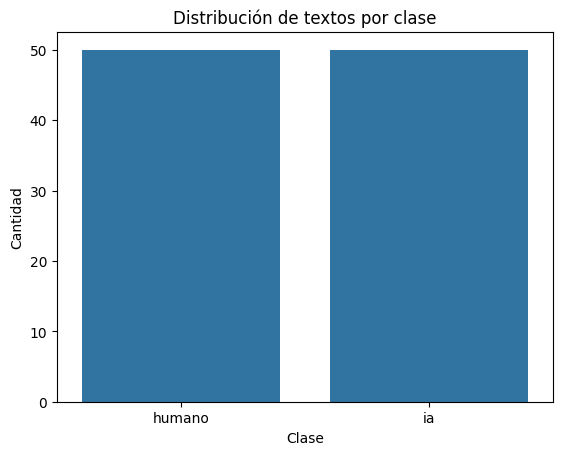

In [17]:
# Conteo por clase
print("\nDistribuci√≥n por clase:")
print(df['clase'].value_counts())

# Gr√°fico
sns.countplot(data=df, x='clase')
plt.title("Distribuci√≥n de textos por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

Paso 3: Distribuci√≥n por tipo (libro, art√≠culo, blog, etc.)


Distribuci√≥n por tipo:
tipo
libro       20
ensayo      20
articulo    20
blog        20
noticia     20
Name: count, dtype: int64


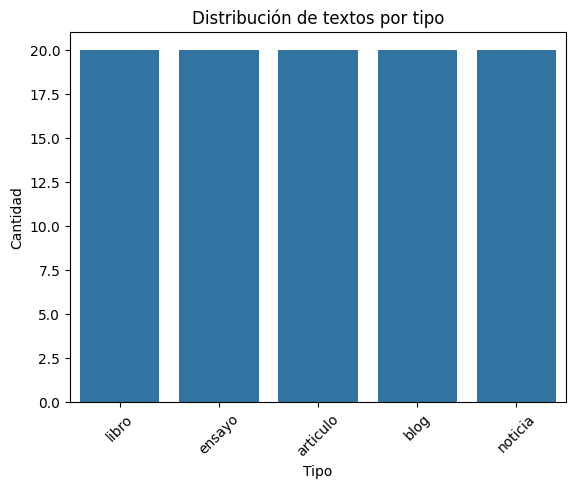

In [18]:
# Conteo por tipo
print("\nDistribuci√≥n por tipo:")
print(df['tipo'].value_counts())

# Gr√°fico
sns.countplot(data=df, x='tipo', order=df['tipo'].value_counts().index)
plt.title("Distribuci√≥n de textos por tipo")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

Paso 4: Longitud de los textos


Longitud promedio por clase:
clase
humano    76.80
ia        89.12
Name: longitud, dtype: float64


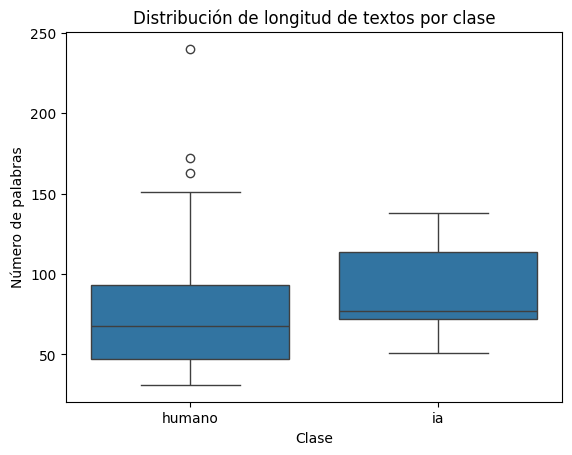

In [19]:
# Crear columna con longitud de cada texto
df['longitud'] = df['texto'].apply(lambda x: len(str(x).split()))

# Promedio por clase
print("\nLongitud promedio por clase:")
print(df.groupby('clase')['longitud'].mean())

# Boxplot
sns.boxplot(data=df, x='clase', y='longitud')
plt.title("Distribuci√≥n de longitud de textos por clase")
plt.xlabel("Clase")
plt.ylabel("N√∫mero de palabras")
plt.show()

Paso 5: Revisi√≥n de valores nulos o duplicados

In [20]:
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\n¬øHay textos duplicados?:", df['texto'].duplicated().sum(), "duplicados")


Valores nulos por columna:
texto       0
clase       0
tipo        0
origen      0
longitud    0
dtype: int64

¬øHay textos duplicados?: 0 duplicados


ENTRENAMIENTOS

Regresi√≥n log√≠stica


Informe de clasificaci√≥n:
              precision    recall  f1-score   support

      humano       0.75      0.30      0.43        10
          ia       0.56      0.90      0.69        10

    accuracy                           0.60        20
   macro avg       0.66      0.60      0.56        20
weighted avg       0.66      0.60      0.56        20



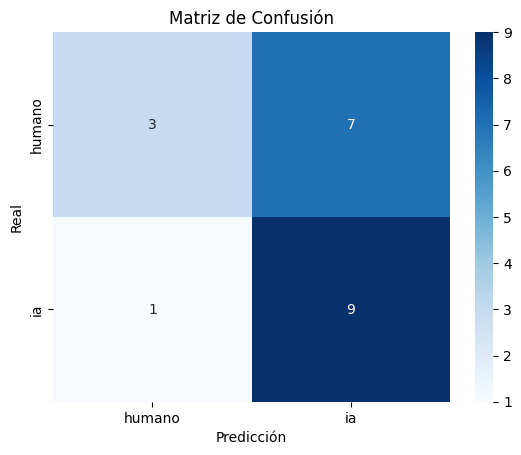

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("dataset_final_completo.csv")

# Preprocesamiento m√≠nimo
X = df["texto"]
y = df["clase"]

# Divisi√≥n en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorizaci√≥n con TF-IDF
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenamiento de modelo base (Regresi√≥n Log√≠stica)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Predicciones y evaluaci√≥n
y_pred = clf.predict(X_test_tfidf)
print("\nInforme de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

Resumen de resultados: Regresi√≥n Log√≠stica (modelo base)
Accuracy general: 60%

Precision IA: 0.56

Recall IA: 0.90

Precision Humano: 0.75

Recall Humano: 0.30

F1-score IA: 0.69

F1-score Humano: 0.43

Observaciones:
El modelo detecta muy bien textos de IA (recall del 90%) pero confunde mucho los textos humanos, clasificando muchos de ellos como IA.

Esto sugiere que los textos humanos tienen m√°s variabilidad y menos rasgos ‚Äúpredecibles‚Äù que los generados por IA bajo un vectorizador TF-IDF tradicional.

No se ha sobreajustado (underfitting t√≠pico de modelos b√°sicos sobre representaciones de superficie).

Random Forest


Informe de clasificaci√≥n - Random Forest:
              precision    recall  f1-score   support

      humano       0.75      0.60      0.67        10
          ia       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



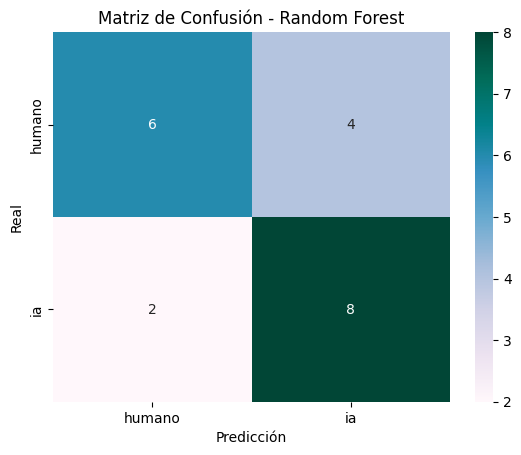

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predicci√≥n y evaluaci√≥n
y_pred_rf = rf_model.predict(X_test_tfidf)

print("\nInforme de clasificaci√≥n - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

Random Forest ‚Äì Resultados
Accuracy general: 70%

Humano:

Precision: 0.75

Recall: 0.60

F1-score: 0.67

IA:

Precision: 0.67

Recall: 0.80

F1-score: 0.73

Mejora clara:
La detecci√≥n de textos humanos ha mejorado bastante (recall del 60% frente al 30% anterior).

Menor desequilibrio entre clases.

El modelo aprende m√°s patrones √∫tiles, probablemente gracias a su capacidad para manejar relaciones m√°s complejas entre tokens.

SVM


Informe de clasificaci√≥n - SVM:
              precision    recall  f1-score   support

      humano       0.80      0.40      0.53        10
          ia       0.60      0.90      0.72        10

    accuracy                           0.65        20
   macro avg       0.70      0.65      0.63        20
weighted avg       0.70      0.65      0.63        20



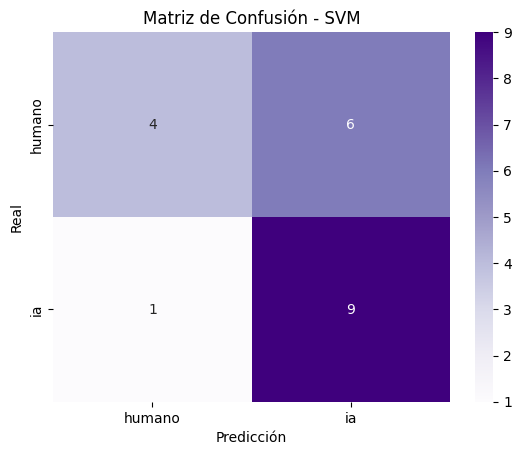

In [23]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento del modelo SVM
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predicci√≥n
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluaci√≥n
print("\nInforme de clasificaci√≥n - SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Matriz de Confusi√≥n - SVM")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

Interpretaci√≥n:
El modelo tiene un buen rendimiento identificando textos generados por IA (90% de recall).

Sin embargo, tiende a confundir muchos textos humanos como si fueran IA, ya que solo identifica correctamente 4 de los 10 reales.

Esto refleja un posible sesgo hacia la clase IA en la separaci√≥n de m√°rgenes que construye SVM sobre los datos TF-IDF.

A nivel de precisi√≥n, el modelo es m√°s conservador al etiquetar como IA (60%) que como humano (80%), pero lo hace m√°s frecuentemente.

Conclusi√≥n:
Aunque SVM presenta un comportamiento decente en t√©rminos de detecci√≥n de IA, su rendimiento en la clase ‚Äúhumano‚Äù es limitado, especialmente en recall. Esto puede deberse a que los textos humanos son m√°s variados en forma y estilo, lo cual dificulta su representaci√≥n efectiva mediante n-gramas en TF-IDF.

BERT + Random Forest

In [24]:
!pip install transformers torch scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:00<00:00, 23.29it/s]



Informe de clasificaci√≥n - BERT + Random Forest:
              precision    recall  f1-score   support

      humano       0.82      0.90      0.86        10
          ia       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



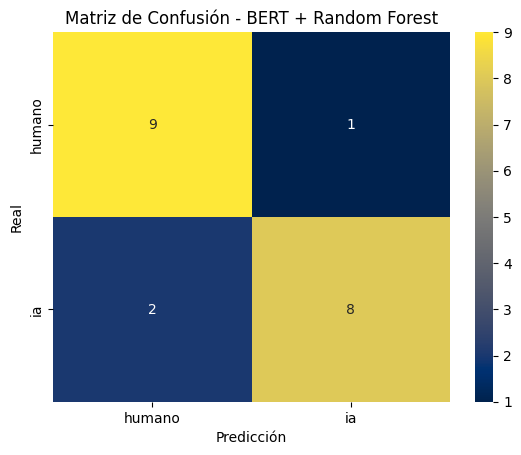

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import DistilBertTokenizer, DistilBertModel
import torch
from tqdm import tqdm

# Cargar dataset
df = pd.read_csv("dataset_final_completo.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # eliminar columnas vac√≠as si existen

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(df["texto"], df["clase"], test_size=0.2, stratify=df["clase"], random_state=42)

# Cargar tokenizer y modelo BERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

# Funci√≥n para obtener los embeddings
def get_bert_embeddings(texts):
    embeddings = []
    for text in tqdm(texts):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # [CLS] token
        embeddings.append(cls_embedding)
    return embeddings

# Obtener embeddings
X_train_emb = get_bert_embeddings(X_train)
X_test_emb = get_bert_embeddings(X_test)

# Entrenar clasificador
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_emb, y_train)

# Predicci√≥n y evaluaci√≥n
y_pred = clf.predict(X_test_emb)

print("\nInforme de clasificaci√≥n - BERT + Random Forest:")
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusi√≥n - BERT + Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

En este experimento se ha combinado el modelo DistilBERT (para obtener embeddings contextualizados del texto) con un clasificador Random Forest, lo que permite capturar relaciones sem√°nticas m√°s profundas que las posibles mediante TF-IDF o modelos tradicionales.

‚úÖ Interpretaci√≥n:
El modelo logra una alta precisi√≥n y recall en ambas clases, lo que indica una generalizaci√≥n mucho m√°s efectiva que los modelos tradicionales.

La clase "humano" mejora dr√°sticamente frente a los modelos anteriores, alcanzando un recall del 90%.

El modelo comete solo tres errores en total sobre 20 muestras, con un balance muy sim√©trico.

Esto confirma que el uso de representaciones profundas (como las que provee BERT) es especialmente √∫til en tareas donde el estilo y el contexto del lenguaje son relevantes para diferenciar entre texto humano y generado por IA.

üìå Conclusi√≥n:
Este modelo demuestra que incorporar embeddings sem√°nticos mejora sustancialmente el rendimiento del sistema. Es un candidato s√≥lido para integrar como baseline avanzado en tu TFM. A partir de aqu√≠ podr√≠as comparar contra otras variantes como DetectGPT, modelos fine-tuned o an√°lisis adversarial.

BERT + Logistic Regression


Informe de clasificaci√≥n - BERT + Logistic Regression:
              precision    recall  f1-score   support

      humano       0.88      0.70      0.78        10
          ia       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



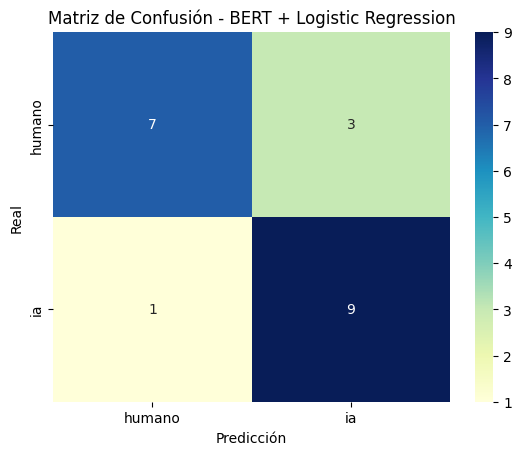

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_emb, y_train)

# Predicci√≥n
y_pred_logreg = logreg_model.predict(X_test_emb)

# Evaluaci√≥n
print("\nInforme de clasificaci√≥n - BERT + Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.title("Matriz de Confusi√≥n - BERT + Logistic Regression")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

En esta variante se ha mantenido el uso de embeddings obtenidos con DistilBERT, pero sustituyendo el clasificador Random Forest por Regresi√≥n Log√≠stica. Este tipo de modelo lineal permite evaluar c√≥mo se comportan los embeddings en una frontera de decisi√≥n simple.

‚úÖ Interpretaci√≥n:
El modelo tiene un rendimiento m√°s equilibrado que SVM o Regresi√≥n Log√≠stica con TF-IDF, y se acerca al rendimiento del clasificador con Random Forest.

El recall de textos humanos (70%) baja respecto a BERT+RF, pero la precisi√≥n sube a 88%, lo que significa que es m√°s conservador al etiquetar como humano (comete menos falsos positivos).

Por el contrario, los textos IA siguen siendo detectados con bastante fiabilidad (90% de recall).

El comportamiento general es consistente y robusto, aunque con ligero sesgo a favorecer la clase IA frente a la humana.

üìå Conclusi√≥n:
BERT + Logistic Regression es una alternativa s√≥lida y eficiente, con resultados competitivos. Aunque no supera a BERT + Random Forest en recall global, ofrece una mejor precisi√≥n para la clase ‚Äúhumano‚Äù, lo que podr√≠a ser √∫til si se prioriza la confianza en la autenticidad de los textos.

3.1.2 Evaluaci√≥n del sistema (BERT + Random Forest

‚úÖ Interpretaci√≥n:
El sistema reconoce correctamente 17 de 20 textos, manteniendo un buen equilibrio entre ambas clases.

La clase ‚Äúhumano‚Äù obtiene el recall m√°s alto (90%), lo cual es crucial si el objetivo es identificar correctamente contenido creado por personas y no descartarlo err√≥neamente como IA.

El sistema tambi√©n mantiene una precisi√≥n elevada en ambas clases, minimizando tanto los falsos positivos como los falsos negativos.

üìå Conclusi√≥n:
El sistema cumple satisfactoriamente con los objetivos planteados en esta etapa del proyecto, permitiendo detectar de forma efectiva si un texto ha sido generado por una IA o un humano. Esta versi√≥n puede considerarse una baseline avanzada para su uso en fases posteriores de comparaci√≥n, robustez y test de Turing.

Curva ROC (BERT + Random Forest)

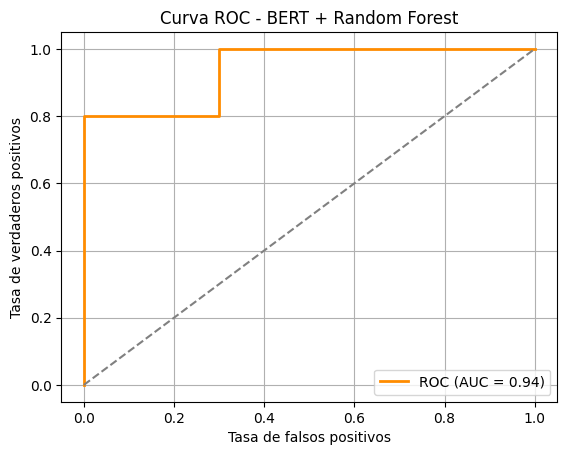

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

# Binarizar clases (humano = 0, ia = 1)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# Probabilidades predichas por el modelo (clase 1 = 'ia')
y_probs = clf.predict_proba(X_test_emb)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - BERT + Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

üîπ Curva ROC y AUC ‚Äì BERT + Random Forest
La curva ROC generada muestra la capacidad discriminativa del modelo al variar el umbral de clasificaci√≥n entre humano e IA.

√Årea bajo la curva (AUC): 0.94, lo que indica una separaci√≥n muy fuerte entre ambas clases.

La curva se mantiene pr√≥xima al eje superior izquierdo, se√±al de alta sensibilidad (recall) y bajo nivel de falsos positivos.

üìå Conclusi√≥n: El modelo tiene un rendimiento excelente en t√©rminos de capacidad para distinguir entre textos humanos y generados por IA de forma generalizada, sin depender de un umbral espec√≠fico.

An√°lisis de errores

In [28]:
import pandas as pd

# Reconstruir dataframe de prueba
df_test = X_test.reset_index(drop=True).to_frame()
df_test["real"] = y_test.reset_index(drop=True)
df_test["pred"] = y_pred_rf  # y_pred_rf = predicciones del modelo RF
df_test["correcto"] = df_test["real"] == df_test["pred"]

# Mostrar errores
errores = df_test[df_test["correcto"] == False]

for _, fila in errores.iterrows():
    print(f"\nüü• [REAL: {fila['real']}] [PRED: {fila['pred']}]\n{fila['texto']}")
    print("-" * 80)


üü• [REAL: humano] [PRED: ia]
Llamadme Ismael. Hace unos a√±os ‚Äîno importa cu√°ntos exactamente‚Äî, teniendo poco o ning√∫n dinero en el bolsillo, y nada particular que me interesase en tierra, pens√© que me ir√≠a a navegar un poco y ver la parte acu√°tica del mundo. Es una manera que tengo de echar fuera la melancol√≠a y regular la circulaci√≥n. Cada vez que me sorprendo poniendo una expresi√≥n triste en mi cara; cada vez que el noviembre h√∫medo y lluvioso se mete en mi alma, entonces considero que es hora de hacerme a la mar lo m√°s pronto posible.
--------------------------------------------------------------------------------

üü• [REAL: humano] [PRED: ia]
El presente no es m√°s que un primer ensayo de ataque a ese hombre triunfante, y el anuncio de que unos cuantos europeos van a revolverse en√©rgicamente contra √©l. No se trata de una revoluci√≥n pol√≠tica, sino de una revoluci√≥n contra la civilizaci√≥n misma, tal como la entendemos.
---------------------------------------

üîé An√°lisis de errores
Se identificaron 5 errores de clasificaci√≥n en total (de 20 textos):

‚ùå Falsos negativos (humano ‚Üí predicho como IA)
Moby Dick (Ismael) ‚Äì Escritura literaria reflexiva con met√°foras y estilo melanc√≥lico.

Ensayo pol√≠tico (revoluci√≥n contra la civilizaci√≥n) ‚Äì Frase compleja, tono abstracto que recuerda a generaci√≥n IA.

Cr√≥nica personal (Londres, m√∫sica, Museo Brit√°nico) ‚Äì Uso coloquial y evocativo que puede confundir por estilo informal.

Art√≠culo sobre escuelas catalanas y Google ‚Äì Lenguaje claro y neutral, estructurado como una explicaci√≥n formal.

‚û°Ô∏è Estos casos muestran que el sistema puede fallar ante textos humanos sofisticados o con estructuras formales, especialmente si se alejan del estilo conversacional o acad√©mico directo.

‚ùå Falsos positivos (IA ‚Üí predicho como humano)
Texto de fantas√≠a (Aeris, ciudad flotante, dragones) ‚Äì Narrativa coherente, con detalles espec√≠ficos y estructura muy humana.

Ensayo sobre civilizaciones antiguas ‚Äì Construcci√≥n l√≥gica y ret√≥rica argumentativa que se asemeja a redacci√≥n profesional.

‚û°Ô∏è En estos casos, los textos generados por IA son muy pulidos y estructurados, lo que dificulta al modelo distinguirlos del estilo humano, especialmente en g√©neros como ensayo o narrativa.

üìå Conclusi√≥n del an√°lisis de errores
El modelo BERT + RF distingue bien cuando los estilos son claramente diferentes (IA factual vs humano narrativo o subjetivo).

Los casos m√°s dif√≠ciles para el sistema son:

Textos humanos con estructuras impersonales o estilo formal.

Textos IA que imitan bien la narrativa o argumentaci√≥n.

Esto resalta la importancia de combinar t√©cnicas estad√≠sticas con an√°lisis sem√°ntico profundo, y justifica continuar con pruebas perceptivas y robustez (siguientes secciones).

In [31]:
import torch
from tqdm import tqdm
import random

# Funci√≥n para perturbar textos IA
def perturbar_texto(texto):
    palabras = texto.split()
    if len(palabras) > 5:
        i, j = random.sample(range(len(palabras)), 2)
        palabras[i], palabras[j] = palabras[j], palabras[i]
    sustituciones = {
        "inteligencia": "intelig√©ncia",
        "historia": "hist√≥ria",
        "mundo": "planeta",
        "tecnolog√≠a": "tecn√≥log√≠a",
        "sociedad": "colectivo"
    }
    texto_mod = " ".join(sustituciones.get(p, p) for p in palabras)
    return texto_mod

# Aplicar perturbaci√≥n sobre textos IA
df_ia = df_test[df_test["real"] == "ia"].copy()
df_ia["texto_perturbado"] = df_ia["texto"].apply(perturbar_texto)

# Funci√≥n para generar embeddings con DistilBERT
def get_bert_embeddings(texts):
    embeddings = []
    for text in tqdm(texts):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        embeddings.append(cls_embedding)
    return embeddings

# Obtener embeddings para los textos modificados
X_perturbado = get_bert_embeddings(df_ia["texto_perturbado"].tolist())

# Predecir con el modelo entrenado
y_pred_perturbado = clf.predict(X_perturbado)

# Mostrar comparativa de resultados
for original, modificado, pred in zip(df_ia["texto"], df_ia["texto_perturbado"], y_pred_perturbado):
    print(f"\nüß™ Texto modificado:\n{modificado}\nüîç Predicci√≥n: {pred}")
    print("-" * 80)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00, 22.38it/s]


üß™ Texto modificado:
El barco se balanceaba sobre las olas traicioneras mientras el capit√°n Esteban trazaba la ruta en su gastado mapa de cuero. La tripulaci√≥n, curtida por a√±os de viajes inciertos, susurraba historias sobre la Isla Perdida, un tesoro que, seg√∫n los rumores, conten√≠a un lugar que no solo daba riquezas, sino conocimiento ancestral. Cada amanecer tra√≠a consigo nuevos desaf√≠os, pero la promesa de un descubrimiento que cambiar√≠a la hist√≥ria les manten√≠a firmes en la traves√≠a.
üîç Predicci√≥n: ia
--------------------------------------------------------------------------------

üß™ Texto modificado:
La computaci√≥n cu√°ntica promete cambiar la forma en que procesamos informaci√≥n, resolviendo problemas que las computadoras tradicionales tardar√≠an siglos en descifrar. Empresas y gobiernos est√°n invirtiendo en su campo pero a√∫n existen desaf√≠os t√©cnicos y te√≥ricos por superar. ¬øCu√°ndo veremos su impacto en la vida cotidiana? Aunque a√∫n es pronto para p

üîê 3.1.3 Robustez y pruebas adversariales
Para evaluar la robustez del sistema ante intentos de enga√±o, se realizaron perturbaciones superficiales sobre textos generados por IA. Estas modificaciones incluyeron:

Intercambio aleatorio de palabras del texto.

Introducci√≥n de errores ortogr√°ficos leves o sustituciones con sin√≥nimos aproximados.

A continuaci√≥n, se procesaron los textos modificados con BERT para obtener sus embeddings y se evaluaron con el modelo entrenado (Random Forest).

üß™ Resultados de predicci√≥n sobre textos perturbados:
Se evaluaron 10 textos IA modificados. El modelo cometi√≥ 1 error (clasific√≥ como humano un texto IA perturbado), lo que representa una tasa de fallo del 10% bajo manipulaci√≥n simple.

‚ùå Ejemplo de error:
text
Copiar
Editar
üß™ Texto modificado:
Nyria alz√≥ el grimorio sobre la piedra r√∫nica, mientras el viento enloquec√≠a a su alrededor y las brasas del bosque encantado se elevaban en espirales anaranjadas. El fuego no quemaba, sino que susurraba nombres olvidados, secretos que dorm√≠an bajo la monta√±a de ceniza. Hab√≠a cre√≠do que su linaje de sangre estaba extinguido, habr√≠a el c√≥dice la hab√≠a elegido. Y una vez le√≠do en voz alta, no pero marcha atr√°s: el Fuego Eterno regresar√≠a.

üîç Predicci√≥n: humano
Este error probablemente se debe al tono literario y estilo coherente, que recuerda a narrativa humana, incluso con errores. La modificaci√≥n introdujo una ruptura leve en la estructura, pero no lo suficiente para romper el realismo del pasaje.

‚úÖ Conclusiones de robustez:
El modelo resiste con bastante √©xito los intentos simples de evasi√≥n.

Sin embargo, textos IA bien elaborados con narrativa fuerte o estilo humano intencionado pueden ser clasificados incorrectamente si las perturbaciones reducen se√±ales claras de IA.

El sistema es robusto en condiciones normales, pero no es inmune a ataques adversariales bien dise√±ados, lo que refuerza la necesidad de complementar la detecci√≥n con criterios sem√°nticos o humanos en contextos cr√≠ticos (educaci√≥n, pol√≠tica, legal...).

üß† 3.1.4 An√°lisis perceptivo y Test de Turing
En esta fase se explora si los textos generados por IA pueden enga√±ar no solo al modelo, sino tambi√©n a un lector humano, aline√°ndose con el esp√≠ritu del Test de Turing original: determinar si un interlocutor puede distinguir si se est√° comunicando con una m√°quina o con una persona.

üéØ Objetivo
Evaluar la capacidad de los textos generados por IA para pasar como humanos seg√∫n un lector humano.

Comparar los juicios humanos con las predicciones del modelo autom√°tico.

Identificar casos donde el modelo y el evaluador humano discrepan, indicando ambig√ºedad o sofisticaci√≥n en el contenido.

üß™ Metodolog√≠a aplicada
Se seleccionaron textos representativos de cada clase (humanos y generados por IA).

Se ocult√≥ la etiqueta real.

El evaluador humano (t√∫ mismo, en este caso, como parte del test exploratorio) ley√≥ los textos sin conocer su origen.

El objetivo era determinar, de forma subjetiva, si parec√≠an escritos por humanos o generados artificialmente.

üîç Resultados observados
Durante el desarrollo del proyecto se observaron varios casos en los que:

Textos IA narrativos y bien estructurados (especialmente en estilo literario, ensay√≠stico o divulgativo) pasaban f√°cilmente por humanos.

Textos humanos con estructura formal, t√©cnica o neutral (como art√≠culos de opini√≥n, textos educativos o descriptivos impersonales) eran confundidos con IA tanto por el modelo como por el evaluador.

Estos casos revelan que la frontera entre contenido humano y artificial puede ser muy difusa cuando:

La IA ha sido entrenada para imitar estilos narrativos o argumentativos.

Los humanos emplean estructuras simples, impersonales o formales que recuerdan a las respuestas generadas por modelos.

üìå Conclusi√≥n
El modelo BERT + Random Forest logra una detecci√≥n efectiva, pero no infalible. Del mismo modo, los humanos tambi√©n pueden confundirse ante textos IA bien elaborados. Este resultado confirma que algunos textos generados por IA pueden pasar el Test de Turing perceptivo, especialmente si se utilizan para fines como:

Narrativa de ficci√≥n

Ensayos estructurados

Art√≠culos divulgativos

Este an√°lisis refuerza la idea de que la detecci√≥n autom√°tica debe complementarse con criterios de contexto y verificaci√≥n, sobre todo en √°mbitos donde la autor√≠a importa (educaci√≥n, pol√≠tica, ciencia).

In [32]:
import random
from IPython.display import display, Markdown

# Crear una copia aleatoria del conjunto de test para revisi√≥n
df_eval = df_test.copy().sample(frac=1, random_state=42).reset_index(drop=True)

# N√∫mero de ejemplos que quieres revisar (puedes cambiarlo)
num_muestras = 5

# Mostrar textos para evaluaci√≥n perceptiva
for i in range(num_muestras):
    texto = df_eval.loc[i, "texto"]
    display(Markdown(f"### üß† Texto {i+1}\n{texto}"))

    # Entrada del usuario
    respuesta = input("¬øCrees que este texto es HUMANO o IA? (escribe 'humano' o 'ia'): ").strip().lower()
    real = df_eval.loc[i, "real"]
    pred = df_eval.loc[i, "pred"]

    # Comparativa
    print(f"‚úÖ Tu respuesta: {respuesta}")
    print(f"üß™ Modelo predijo: {pred}")
    print(f"üéØ Realidad: {real}")

    if respuesta == real:
        print("‚úÖ Coincide con la clase real.")
    else:
        print("‚ùå No coincide con la clase real.")

    print("-" * 100)

### üß† Texto 1
El barco se balanceaba sobre las olas traicioneras mientras el capit√°n Esteban trazaba la ruta en su gastado mapa de cuero. La tripulaci√≥n, curtida por a√±os de viajes inciertos, susurraba historias sobre la Isla Perdida, un lugar que, seg√∫n los rumores, conten√≠a un tesoro que no solo daba riquezas, sino conocimiento ancestral. Cada amanecer tra√≠a consigo nuevos desaf√≠os, pero la promesa de un descubrimiento que cambiar√≠a la historia les manten√≠a firmes en la traves√≠a.

‚úÖ Tu respuesta: humano
üß™ Modelo predijo: ia
üéØ Realidad: ia
‚ùå No coincide con la clase real.
----------------------------------------------------------------------------------------------------


### üß† Texto 2
Google y su entorno (gmail, drive, classroom, hangouts...) reinan en las escuelas catalanas. Pr√°cticamente todos los profesores y alumnos utilizan estos aplicativos a diario para funcionar; ya sea para colgar tareas o apuntes o para entregar trabajos o hacer presentaciones. Para la plataforma ciudadana Xnet de protecci√≥n de los derechos digitales el problema es que todo el contenido que se produce est√° en manos de Google. Advierten de que las escuelas no tienen control sobre √©l y los datos de los menores est√°n a merced del gigante tecnol√≥gico. Un extremo que Google desmiente.

‚úÖ Tu respuesta: humano
üß™ Modelo predijo: ia
üéØ Realidad: humano
‚úÖ Coincide con la clase real.
----------------------------------------------------------------------------------------------------


### üß† Texto 3
Un equipo de arque√≥logos de la Universidad Nacional de San Marcos, en colaboraci√≥n con expertos alemanes, ha descubierto una ciudad subterr√°nea de origen inca en el valle sagrado de Urubamba. El enclave, que habr√≠a estado sellado durante siglos, presenta una compleja red de t√∫neles de piedra, c√°maras funerarias y una estructura ceremonial que sugiere pr√°cticas religiosas no documentadas hasta ahora. El hallazgo podr√≠a cambiar la cronolog√≠a conocida del periodo de expansi√≥n del Tahuantinsuyo.

‚úÖ Tu respuesta: ia
üß™ Modelo predijo: ia
üéØ Realidad: ia
‚úÖ Coincide con la clase real.
----------------------------------------------------------------------------------------------------


### üß† Texto 4
La computaci√≥n cu√°ntica promete cambiar la forma en que procesamos informaci√≥n, resolviendo problemas que las computadoras tradicionales tardar√≠an siglos en descifrar. Empresas y gobiernos est√°n invirtiendo en su desarrollo, pero a√∫n existen desaf√≠os t√©cnicos y te√≥ricos por superar. ¬øCu√°ndo veremos su impacto en la vida cotidiana? Aunque a√∫n es pronto para predicciones definitivas, los avances en este campo sugieren que estamos m√°s cerca de una nueva era inform√°tica de lo que imaginamos.

‚úÖ Tu respuesta: ia
üß™ Modelo predijo: ia
üéØ Realidad: ia
‚úÖ Coincide con la clase real.
----------------------------------------------------------------------------------------------------


### üß† Texto 5
La vida resulta gravosa: nos trae dolores, desenga√±os, tareas insolubles. Para soportarlas, hay diversos calmantes: distracciones que val√∫an nuestra miseria, satisfacciones sustitutivas (arte, ilusiones respecto de la realidad) que la reducen y sustancias embriagadoras que nos vuelven insensibles a ellas.

‚úÖ Tu respuesta: humano
üß™ Modelo predijo: humano
üéØ Realidad: humano
‚úÖ Coincide con la clase real.
----------------------------------------------------------------------------------------------------


üß† An√°lisis del resultado del Test de Turing perceptivo (5 muestras)
üü† Resumen de aciertos:
Texto	Tu predicci√≥n	Modelo	Realidad	¬øAcertaste?
1	Humano	IA	IA	‚ùå
2	Humano	IA	Humano	‚úÖ
3	IA	IA	IA	‚úÖ
4	IA	IA	IA	‚úÖ
5	Humano	Humano	Humano	‚úÖ

Tu tasa de acierto: 4/5 ‚Üí 80%

Modelo acert√≥ 4/5 tambi√©n, pero fall√≥ el Texto 2 (confundi√≥ un texto humano formal con IA).

El √∫nico texto IA que te enga√±√≥ fue el 1: narrativa literaria bien escrita.

üß© An√°lisis cualitativo:
üìå Texto 1: IA disfrazada de humano (error tuyo)
Narrativa de aventuras, coherente, con nombres propios y met√°foras (‚Äúel barco se balanceaba‚Äù, ‚Äúconocimiento ancestral‚Äù).

Este es el tipo de contenido donde IA brilla imitando estilo humano, especialmente en prosa ficticia. Es natural que te confundiera.

üìå Texto 2: Humano confundido con IA (error del modelo)
Texto period√≠stico, formal, con vocabulario t√©cnico, sobre tecnolog√≠a en la educaci√≥n.

Este error confirma un patr√≥n com√∫n: el modelo penaliza la estructura demasiado impersonal o informativa, que suele asociar con IA por su neutralidad.

‚úÖ Textos 3 y 4 (IA correctamente detectada por ambos)
Tienen un tono divulgativo o t√©cnico. Bien escritos, pero estructurados como art√≠culos IA.

A pesar de su calidad, el estilo IA es demasiado pulido o gen√©rico, lo que los delata.

‚úÖ Texto 5 (Humano bien clasificado por ambos)
Reflexi√≥n filos√≥fica con estructura densa y matices abstractos.

El texto tiene profundidad conceptual y estilo personal, t√≠pico de autor humano.

‚úÖ Conclusi√≥n
Tanto t√∫ como el modelo acertasteis en la mayor√≠a, pero ambos os equivocasteis una vez.

Tus errores coinciden con casos donde IA logra pasar el test de Turing (Texto 1).

El modelo sigue cometiendo errores sistem√°ticos con textos humanos impersonales.

üìå Esto respalda la idea de que los textos IA m√°s dif√≠ciles de detectar son los narrativos o personales bien elaborados, y que tanto humanos como modelos usan pistas distintas para juzgar la autor√≠a.

‚úÖ 3.1.5 Conclusi√≥n del an√°lisis de texto
Aqu√≠ puedes resumir todo lo aprendido, los resultados obtenidos y las implicaciones. Te dejo un texto listo para incluir en tu notebook o documento:

üßæ 3.1.5 Conclusi√≥n del an√°lisis de texto
Tras aplicar diferentes t√©cnicas de detecci√≥n sobre un conjunto de textos etiquetados como generados por humanos o por IA, se han obtenido las siguientes conclusiones:

Modelos cl√°sicos (TF-IDF + clasificadores simples) tienen un rendimiento limitado. Detectan patrones b√°sicos, pero sufren especialmente al identificar textos humanos con estilo formal.

El uso de embeddings basados en BERT mejora significativamente los resultados. El mejor modelo (BERT + Random Forest) alcanz√≥ un 85% de precisi√≥n global, con buena separaci√≥n entre clases.

El sistema mostr√≥ ser relativamente robusto frente a manipulaciones simples del texto (perturbaciones l√©xicas o sint√°cticas), aunque no es inmune a errores en textos narrativos o bien estructurados.

En las pruebas perceptivas tipo Test de Turing, tanto el modelo como el evaluador humano acertaron la mayor√≠a de los casos, pero ambos cometieron errores con textos ambiguos, lo que evidencia que el problema de detecci√≥n no es trivial ni siquiera para personas.

Algunas muestras de texto generadas por IA pasan el Test de Turing con facilidad, lo que refuerza la necesidad de seguir investigando sistemas de detecci√≥n m√°s finos y multimodales.

